# VGG16

In [74]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [75]:
# Define parameters 
BATCH_SIZE = 32
IMG_HEIGHT = 400
IMG_WIDTH = 400

data_dir = "/Users/deepak/Desktop/University/Deep Learning/Animals"

In [76]:
# load dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
   data_dir, 
   validation_split = 0.2,
   subset = "training",
   seed = 48,  
   image_size = (IMG_HEIGHT, IMG_WIDTH), 
   batch_size = BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split = 0.2, 
    subset = "validation", 
    seed = 48, 
    image_size = (IMG_HEIGHT, IMG_WIDTH), 
    batch_size = BATCH_SIZE
)

Found 66 files belonging to 3 classes.
Using 53 files for training.
Found 66 files belonging to 3 classes.
Using 13 files for validation.


In [77]:
# print names
class_names = train_ds.class_names
class_names

['cat1', 'dogs1', 'snakes1']

In [78]:
for image_batch, labels_batch in train_ds: 
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 400, 400, 3)
(32,)
(21, 400, 400, 3)
(21,)


2025-10-23 10:41:02.905156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [79]:
# define resizing function
IMAGE_SIZE = (224, 224)

def resize_image_and_label(image, label): 
    image = tf.image.resize(image, IMAGE_SIZE)
    return image, label

In [80]:
# apply the function to each dataset object using the map() function
train_ds = train_ds.map(resize_image_and_label)
val_ds = train_ds.map(resize_image_and_label)

In [81]:
# 2. Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

In [82]:
# 3. Build transfer learning model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
# 4. Train model
history = model.fit(
    x=train_ds, validation_data = val_ds,
    epochs=10,
    verbose=1
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.3585 - loss: 35.3739 - val_accuracy: 0.9623 - val_loss: 2.2538
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9434 - loss: 7.7610 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9811 - loss: 1.5966 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.9623 - loss: 3.9111 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.9811 - loss: 2.4889 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9811 - loss: 3.0054 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.9623 - loss: 4.3159 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_

In [84]:
# 5. Evaluate on test set
test_loss, test_acc = model.evaluate(train_ds, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 1.0000


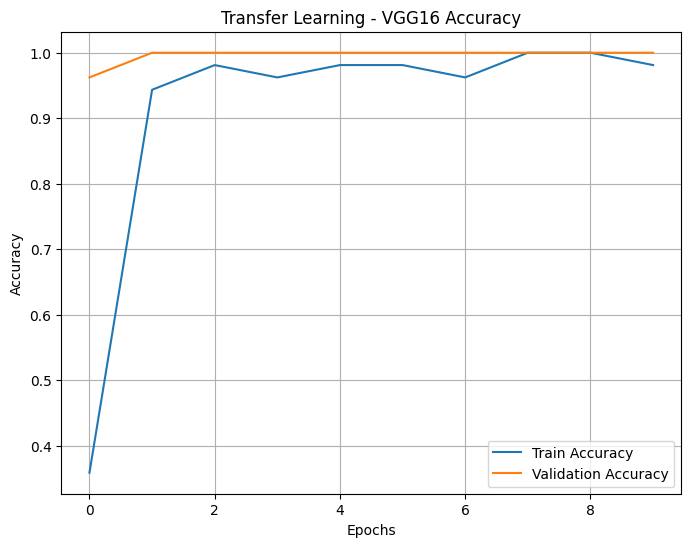

In [85]:
# 6. Plot training vs validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Transfer Learning - VGG16 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

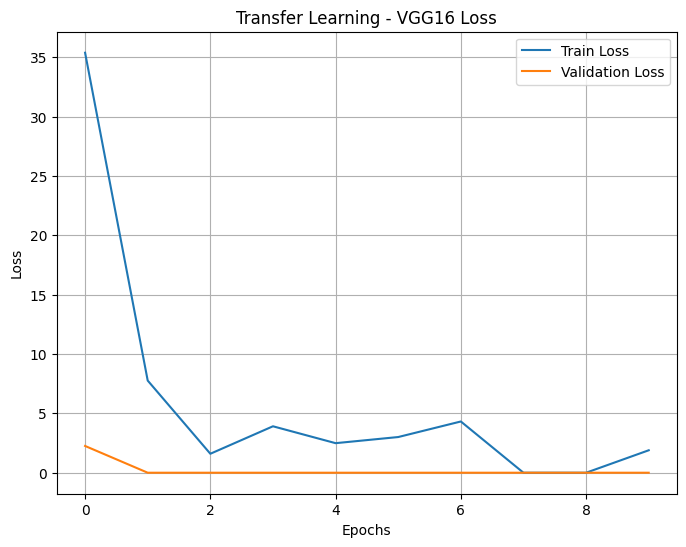

In [86]:
# 7. Plot training vs validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Transfer Learning - VGG16 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


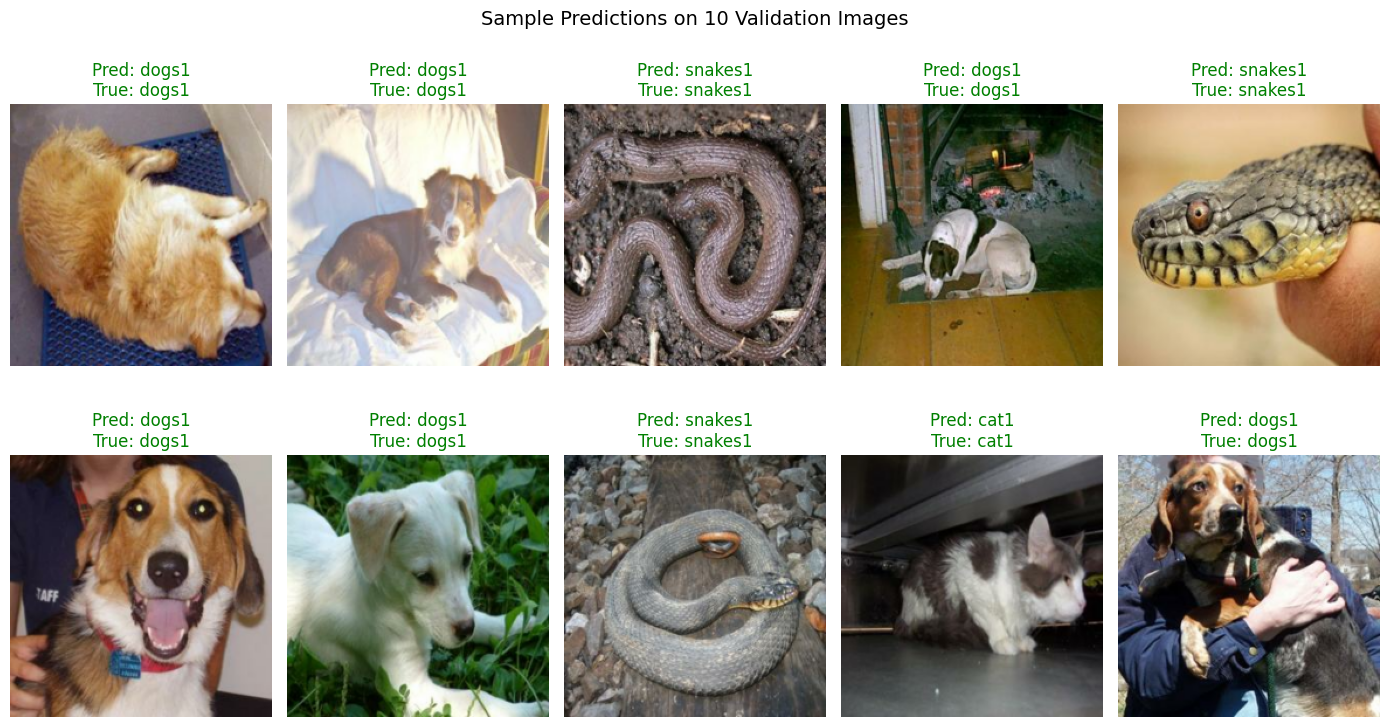

In [87]:
# 8. Sample predictions

class_names = ['cat1', 'dogs1', 'snakes1']

NUM_SAMPLES = 10

# S-1: Extract a small batch of data from the validation dataset
sample_ds = val_ds.unbatch().take(NUM_SAMPLES).batch(NUM_SAMPLES)

# S-2: Extract the images and true labels as NumPy arrays
for images, true_labels_batch in sample_ds.as_numpy_iterator():
    sample_images = images
    sample_true_labels = true_labels_batch
    break

preds = model.predict(sample_images)
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(14, 8))

for i in range(10):
    plt.subplot(2, 5, i+1)

    img_to_plot = sample_images[i]
    # if img_to_plot.max() <= 1.0: 
    #     img_to_plot = (img_to_plot * 255).astype('uint8')

    plt.imshow(sample_images[i].astype(np.uint8))

    true_label_idx = np.argmax(sample_true_labels[i]) if sample_true_labels.ndim > 1 else int(sample_true_labels[i])

    pred_name = class_names[pred_labels[i]]
    true_name = class_names[true_label_idx]

    # Set the title, highlighting incorrect predictions
    color = "green" if pred_name == true_name else "red"
    plt.title(f"Pred: {pred_name}\nTrue: {true_name}", color=color)
    plt.axis('off')

plt.suptitle(f"Sample Predictions on {NUM_SAMPLES} Validation Images", fontsize=14)
plt.tight_layout()
plt.show()


In [88]:
# 9. Generate predictions for the entire test set
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# 9-1 Extract and format the true labels from the dataset
y_true_list = []
for _, labels in val_ds.unbatch(): 
    y_true_list.append(labels.numpy())

y_true = np.array(y_true_list)

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x12e911800> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 706ms/step


2025-10-23 10:41:47.814324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


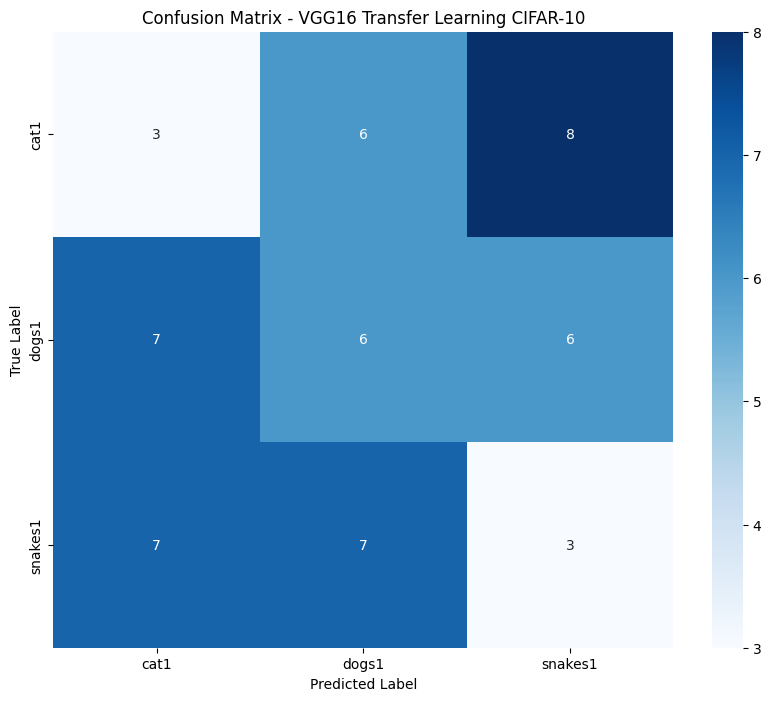

In [89]:
# 10. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - VGG16 Transfer Learning CIFAR-10")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [90]:
# 11. Classification Report
print("\nClassification Report - VGG16 Transfer Learning CIFAR-10")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report - VGG16 Transfer Learning CIFAR-10
              precision    recall  f1-score   support

        cat1       0.18      0.18      0.18        17
       dogs1       0.32      0.32      0.32        19
     snakes1       0.18      0.18      0.18        17

    accuracy                           0.23        53
   macro avg       0.22      0.22      0.22        53
weighted avg       0.23      0.23      0.23        53

